# Classifying Airplane Accidents Based on Severity

## Context

In 2018, there were [15 airplane accidents](https://www.cnn.com/2019/01/02/health/plane-crash-deaths-intl/index.html) of varying severity each year, with over 500 deaths. Although airplane safety continues to increase each year, we are interested in knowing if this number can be reduced further. We plan to investigate this by predicting the severity of a crash based on crash details, and determining which factors weight the most heavily on the severity of an accident. 

[Data Source](https://www.hackerearth.com/challenges/competitive/airplane-accident-severity-hackerearth-machine-learning-challenge/machine-learning/how-severe-can-an-airplane-accident-be-03e7a3f1/)

## Goals

- Predict the severity of an airplane accident based on several features:
    - Number of days since inspection 
    - Total safety complains
    - An estimation of how much control the pilot had during the incident
    - Turbulence
    - Cabin temperature
    - Accident type
    - Max elevation
    - Number of prior violations

In [1]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
# check out the dataframe

df_train = pd.read_csv('3c055e822d5b11ea/train.csv')

df_train.head(15)

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054
5,Minor_Damage_And_Injuries,43.333333,15,0,73.336372,0.432954,78.63,2,29288.448105,1,0.394505,10947
6,Highly_Fatal_And_Damaging,22.009132,15,10,62.853236,0.314671,88.04,4,32342.109345,0,0.058872,4717
7,Minor_Damage_And_Injuries,24.703196,18,4,60.802188,0.548353,83.48,4,22547.195242,2,0.040419,8008
8,Highly_Fatal_And_Damaging,54.840183,5,40,69.234275,0.335587,78.24,2,45751.983413,0,0.619186,8179
9,Significant_Damage_And_Serious_Injuries,52.237443,6,4,57.429353,0.465410,79.56,1,37933.399001,1,1.389295,6324


In [3]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Safety_Score,10000.0,41.876406,16.138072,0.000000,30.593607,41.278539,52.511416,100.000000
Days_Since_Inspection,10000.0,12.931100,3.539803,1.000000,11.000000,13.000000,15.000000,23.000000
Total_Safety_Complaints,10000.0,6.564300,6.971982,0.000000,2.000000,4.000000,9.000000,54.000000
Control_Metric,10000.0,65.145324,11.882934,0.000000,56.927985,65.587967,73.336372,100.000000
Turbulence_In_gforces,10000.0,0.381495,0.121301,0.134000,0.293665,0.365879,0.451346,0.882648
Cabin_Temperature,10000.0,79.969331,2.759739,74.740000,77.960000,79.540000,81.560000,97.510000
Accident_Type_Code,10000.0,3.814900,1.902577,1.000000,2.000000,4.000000,5.000000,7.000000
Max_Elevation,10000.0,32001.803282,9431.995196,831.695553,25757.636908,32060.336419,38380.641513,64297.651218
Violations,10000.0,2.012200,1.039980,0.000000,1.000000,2.000000,3.000000,5.000000
Adverse_Weather_Metric,10000.0,0.255635,0.381128,0.000316,0.012063,0.074467,0.354059,2.365378


In [4]:
X = df_train.drop(['Severity'], axis=1)
y = df_train['Severity']

In [21]:
# one hot encoding for severity column 
# one hot encoding encodes categorical features as a one-hot numeric array

# set split = y target 
y 
#integer encode the categorical values
le = LabelEncoder()
integer_encoded = le.fit_transform(y)

y = integer_encoded

# binary encode the values
# onehot_encoder = OneHotEncoder(sparse=False)
# integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
# onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

# onehot_encoded = y

print(y)

[1 1 2 ... 3 1 0]


In [22]:
print(X.shape)
print(y.shape)

(10000, 11)
(10000,)


In [23]:
# train test split
# test_size is default of 75/25 split 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [24]:
print(X_train.shape)
print(y_train.shape)



(7500, 11)
(7500,)


In [25]:
y_train

array([0, 1, 1, ..., 0, 2, 3])

In [26]:
# setting y_train equal to the onehotencoded y values


In [27]:
print(X_train.shape)
print(y_train.shape)

(7500, 11)
(7500,)


In [29]:
y_train

array([0, 1, 1, ..., 0, 2, 3])

# scaling 
# minmax or standard scaler?

Fit() is used to compute the parameter needed for transformation and transform() is for scaling the data to convert into standard format for the model.

fit_tranform() is combination of two which is doing above work in efficiently.

Since fit_transform() is already computing and transforming the training data only transformation for testing data is left,since parameter needed for transformation is already computed and stored only transformation() of testing data is left therefor only transform() is used instead of fit_transform().

In [30]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

In [33]:
X_scaled = ss.fit_transform(X_train)
X_scaled.shape



(7500, 11)

# Random Forests

Build a baseline Tree 

Random Search / Grid Search 

Best Params or OOB score?

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier


tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5) 

In [35]:
tree_clf.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [36]:
tree_clf.feature_importances_


array([0.3189167 , 0.29538672, 0.        , 0.2390586 , 0.        ,
       0.        , 0.14579811, 0.00083988, 0.        , 0.        ,
       0.        ])

In [38]:
# scaling 
# minmax or standard scaler?

import matplotlib.pyplot as plt

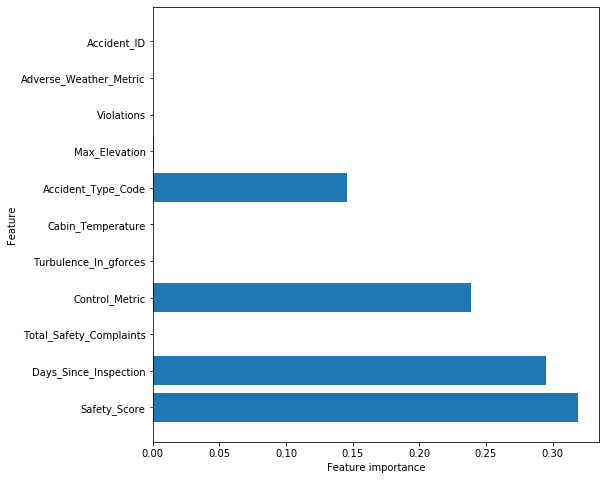

In [39]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

In [18]:
# decide on type of model
# linear svc? KNeighbors if it doesnt work? (according to flow chart) 
# random forest with boosted? (suggested by nick)
# 